### **Problem Statement:**
#### Use decision trees to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

#### Data Description :

#### Undergrad : person is under graduated or not
#### Marital.Status : marital status of a person
#### Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
#### Work Experience : Work experience of an individual person
#### Urban : Whether that person belongs to urban area or not


### 1. Import Dataset 

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,classification_report

### 2. Import Data 

In [4]:
# import data 
Fraud = pd.read_csv(r'D:\Study Materials\ExcelR\Data Science\Assignments\Random Forest\Fraud_check.csv')
Fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


### 3. Data Understanding

In [8]:
Fraud = Fraud.rename(columns={'Marital.Status':'Marital_Status', 'Taxable.Income':'Taxable_Income','Work.Experience':'Work_Experience','City.Population':'City_Population'})
Fraud

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [9]:
Fraud['Income_range'] = np.where(Fraud['Taxable_Income']>=30000, 'Good', 'Risky')
Fraud

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban,Income_range
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [10]:
Fraud_data = pd.get_dummies(Fraud.iloc[:,:6])
Fraud_data

,Taxable_Income,City_Population,Work_Experience,Undergrad_NO,Undergrad_YES,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Urban_NO,Urban_YES
0,68833,50047,10,1,0,0,0,1,0,1
1,33700,134075,18,0,1,1,0,0,0,1
2,36925,160205,30,1,0,0,1,0,0,1
3,50190,193264,15,0,1,0,0,1,0,1
4,81002,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1
596,69967,55369,2,0,1,1,0,0,0,1
597,47334,154058,0,1,0,1,0,0,0,1
598,98592,180083,17,0,1,0,1,0,1,0


In [11]:
Fd= Fraud_data.drop(columns={'Taxable_Income'},axis=1)
Fd

,City_Population,Work_Experience,Undergrad_NO,Undergrad_YES,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Urban_NO,Urban_YES
0,50047,10,1,0,0,0,1,0,1
1,134075,18,0,1,1,0,0,0,1
2,160205,30,1,0,0,1,0,0,1
3,193264,15,0,1,0,0,1,0,1
4,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
595,39492,7,0,1,1,0,0,0,1
596,55369,2,0,1,1,0,0,0,1
597,154058,0,1,0,1,0,0,0,1
598,180083,17,0,1,0,1,0,1,0


In [12]:
Fd1 = pd.concat([Fraud['Income_range'], Fd], axis=1)
Fd1

,Income_range,City_Population,Work_Experience,Undergrad_NO,Undergrad_YES,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Urban_NO,Urban_YES
0,Good,50047,10,1,0,0,0,1,0,1
1,Good,134075,18,0,1,1,0,0,0,1
2,Good,160205,30,1,0,0,1,0,0,1
3,Good,193264,15,0,1,0,0,1,0,1
4,Good,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,Good,39492,7,0,1,1,0,0,0,1
596,Good,55369,2,0,1,1,0,0,0,1
597,Good,154058,0,1,0,1,0,0,0,1
598,Good,180083,17,0,1,0,1,0,1,0


In [5]:
Fraud.shape

(600, 6)

In [6]:
Fraud.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [13]:
Fraud.dtypes

Undergrad          object
Marital_Status     object
Taxable_Income      int64
City_Population     int64
Work_Experience     int64
Urban              object
Income_range       object
dtype: object

### **EDA**

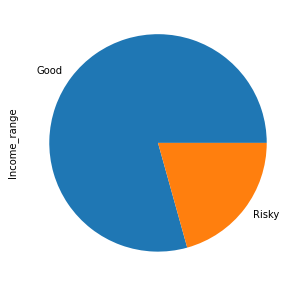

Good     476
Risky    124
Name: Income_range, dtype: int64


In [15]:
plt.figure(figsize=(5,5))
Fd1['Income_range'].value_counts().plot.pie()
plt.show()
print(Fd1['Income_range'].value_counts())

In [16]:
Fd1.isnull().sum()

Income_range               0
City_Population            0
Work_Experience            0
Undergrad_NO               0
Undergrad_YES              0
Marital_Status_Divorced    0
Marital_Status_Married     0
Marital_Status_Single      0
Urban_NO                   0
Urban_YES                  0
dtype: int64

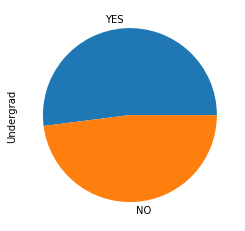

YES    312
NO     288
Name: Undergrad, dtype: int64


In [17]:
Fraud['Undergrad'].value_counts().plot.pie()
plt.show()
print(Fraud['Undergrad'].value_counts())

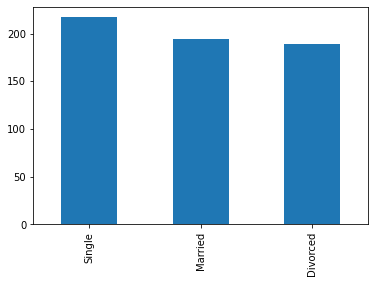

Single      217
Married     194
Divorced    189
Name: Marital_Status, dtype: int64


In [18]:
Fraud['Marital_Status'].value_counts(sort=True).plot.bar()
plt.show()
print(Fraud['Marital_Status'].value_counts())

### **Model Building**

### **Building Decision Tree Classifier using Entropy Criteria**

### **Model 1**

In [19]:
x=Fd1.iloc[:,1:]
y=Fd1['Income_range']

In [20]:
x

,City_Population,Work_Experience,Undergrad_NO,Undergrad_YES,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Urban_NO,Urban_YES
0,50047,10,1,0,0,0,1,0,1
1,134075,18,0,1,1,0,0,0,1
2,160205,30,1,0,0,1,0,0,1
3,193264,15,0,1,0,0,1,0,1
4,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
595,39492,7,0,1,1,0,0,0,1
596,55369,2,0,1,1,0,0,0,1
597,154058,0,1,0,1,0,0,0,1
598,180083,17,0,1,0,1,0,1,0


In [21]:
y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Income_range, Length: 600, dtype: object

In [22]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.35,random_state=42)

In [23]:
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10)
Random_forest_model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
Random_forest_model.fit(x_train,y_train)

RandomForestClassifier(max_features=3)

In [24]:
Random_forest_results = cross_val_score(Random_forest_model, x_train, y_train, cv=kfold)
print(Random_forest_results.mean())

0.7384615384615385


In [25]:
Random_forest_preds = Random_forest_model.predict(x_test)
pd.crosstab(y_test,Random_forest_preds)

col_0,Good,Risky
Income_range,,
Good,152,12
Risky,45,1


In [26]:
# Accuracy 
np.mean(Random_forest_preds==y_test)

0.7285714285714285

In [39]:
print('Accuracy Score        :',accuracy_score(y_test,Random_forest_preds))
print('Classification Report :\n',classification_report(y_test,Random_forest_preds))

Accuracy Score        : 0.7285714285714285
Classification Report :
               precision    recall  f1-score   support

        Good       0.77      0.93      0.84       164
       Risky       0.08      0.02      0.03        46

    accuracy                           0.73       210
   macro avg       0.42      0.47      0.44       210
weighted avg       0.62      0.73      0.67       210



**Model 2** 

In [27]:
# Splitting data into training and testing data set
x_train1, x_test1,y_train1,y_test1 = train_test_split(x,y, test_size=0.4,random_state=42)

In [28]:
  num_trees = 150
max_features = 4
kfold = KFold(n_splits=15)
Random_forest_model1 = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
Random_forest_model1.fit(x_train1,y_train1)

RandomForestClassifier(max_features=4, n_estimators=150)

In [29]:
Random_forest_results1 = cross_val_score(Random_forest_model1, x_train1, y_train1, cv=kfold)
print(Random_forest_results1.mean())

0.7583333333333333


In [30]:
Random_forest_preds1 = Random_forest_model1.predict(x_test1)
pd.crosstab(y_test1,Random_forest_preds1)

col_0,Good,Risky
Income_range,,
Good,178,9
Risky,51,2


In [31]:
# Accuracy 
np.mean(Random_forest_preds1==y_test1)

0.75

In [40]:
print('Accuracy Score        :',accuracy_score(y_test1,Random_forest_preds1))
print('Classification Report :\n',classification_report(y_test1,Random_forest_preds1))

Accuracy Score        : 0.75
Classification Report :
               precision    recall  f1-score   support

        Good       0.78      0.95      0.86       187
       Risky       0.18      0.04      0.06        53

    accuracy                           0.75       240
   macro avg       0.48      0.49      0.46       240
weighted avg       0.65      0.75      0.68       240



**Model 3**

In [32]:
# Splitting data into training and testing data set
x_train2, x_test2,y_train2,y_test2 = train_test_split(x,y, test_size=0.33,random_state=82)

In [33]:
num_trees = 200
max_features = 5
kfold = KFold(n_splits=20)
Random_forest_model2 = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
Random_forest_model2.fit(x_train2,y_train2)

RandomForestClassifier(max_features=5, n_estimators=200)

In [34]:
Random_forest_results2 = cross_val_score(Random_forest_model2, x_train2, y_train2, cv=kfold)
print(Random_forest_results2.mean())

0.798095238095238


In [35]:
Random_forest_preds2 = Random_forest_model2.predict(x_test2)
pd.crosstab(y_test2,Random_forest_preds2)

col_0,Good,Risky
Income_range,,
Good,143,6
Risky,49,0


In [36]:
# Accuracy 
np.mean(Random_forest_preds2==y_test2)

0.7222222222222222

In [42]:
print('Accuracy Score        :',accuracy_score(y_test,Random_forest_preds))
print('Classification Report :\n',classification_report(y_test,Random_forest_preds))

Accuracy Score        : 0.7285714285714285
Classification Report :
               precision    recall  f1-score   support

        Good       0.77      0.93      0.84       164
       Risky       0.08      0.02      0.03        46

    accuracy                           0.73       210
   macro avg       0.42      0.47      0.44       210
weighted avg       0.62      0.73      0.67       210



### Check Grid Search CV to get best Parameters 

In [43]:
from sklearn.model_selection import GridSearchCV
grid_cv = GridSearchCV(estimator = RandomForestClassifier(),
                       param_grid = {'n_estimators':[5,10,15,20,30,50,75,100,125,150,175,200],
                                      'criterion': ['gini','entropy'],
                                      'max_depth' : [2,3,5,6,7,8,9,10],
                                      'max_features': [3,4,5,6]},
                                        cv=5)
grid_cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 6, 7, 8, 9, 10],
                         'max_features': [3, 4, 5, 6],
                         'n_estimators': [5, 10, 15, 20, 30, 50, 75, 100, 125,
                                          150, 175, 200]})

In [44]:
grid_cv.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 5, 'n_estimators': 30}

In [45]:
grid_cv.best_score_

0.8025641025641026

### Now, build the model with max_depth 8 , Entropy Criteria , n_estimators - 30, max_features  5

In [46]:
rf_final = RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=10,max_features=5)
rf_final.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features=5)

##### Training Accuracy

In [47]:
y_pred_final_train = rf_final.predict(x_train)

In [48]:
print('Accuracy Score        :',accuracy_score(y_train,y_pred_final_train))
print('Classification Report :\n',classification_report(y_train,y_pred_final_train))

Accuracy Score        : 0.9666666666666667
Classification Report :
               precision    recall  f1-score   support

        Good       0.96      1.00      0.98       312
       Risky       1.00      0.83      0.91        78

    accuracy                           0.97       390
   macro avg       0.98      0.92      0.94       390
weighted avg       0.97      0.97      0.97       390



#####  Testing Accuracy

In [50]:
y_pred_final_test = rf_final.predict(x_test)

In [51]:
print('Accuracy Score        :',accuracy_score(y_test,y_pred_final_test))
print('Classification Report :\n',classification_report(y_test,y_pred_final_test))

Accuracy Score        : 0.780952380952381
Classification Report :
               precision    recall  f1-score   support

        Good       0.78      0.99      0.88       164
       Risky       0.50      0.02      0.04        46

    accuracy                           0.78       210
   macro avg       0.64      0.51      0.46       210
weighted avg       0.72      0.78      0.69       210



In [52]:
feature_importance = pd.DataFrame({ 'Features'  : x_train.columns,'RF_Features': rf_final.feature_importances_})
feature_importance 

,Features,RF_Features
0,City_Population,0.495838
1,Work_Experience,0.315734
2,Undergrad_NO,0.026350
3,Undergrad_YES,0.026268
4,Marital_Status_Divorced,0.025992
5,Marital_Status_Married,0.030113
6,Marital_Status_Single,0.024097
7,Urban_NO,0.028472
8,Urban_YES,0.027136


In [53]:
Rf_feature_imp =feature_importance.sort_values(by= 'RF_Features',axis=0,ascending=False,)
Rf_feature_imp

,Features,RF_Features
0,City_Population,0.495838
1,Work_Experience,0.315734
5,Marital_Status_Married,0.030113
7,Urban_NO,0.028472
8,Urban_YES,0.027136
2,Undergrad_NO,0.026350
3,Undergrad_YES,0.026268
4,Marital_Status_Divorced,0.025992
6,Marital_Status_Single,0.024097


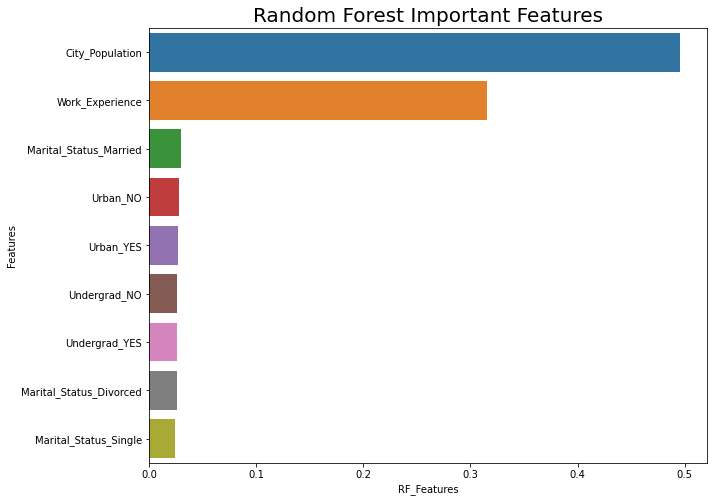

In [54]:
plt.figure(figsize=(10,8))
sns.barplot(x='RF_Features',y='Features',data=Rf_feature_imp,)
plt.title('Random Forest Important Features',size = 20)
plt.show()

### Conclusion

We Can Clearly see that City_Population is the important factor determing Fraud